                            OLS Regression Results                            
Dep. Variable:     log_cited_by_count   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     1183.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:05:07   Log-Likelihood:                -11563.
No. Observations:                9816   AIC:                         2.314e+04
Df Residuals:                    9809   BIC:                         2.319e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

<Figure size 800x600 with 0 Axes>

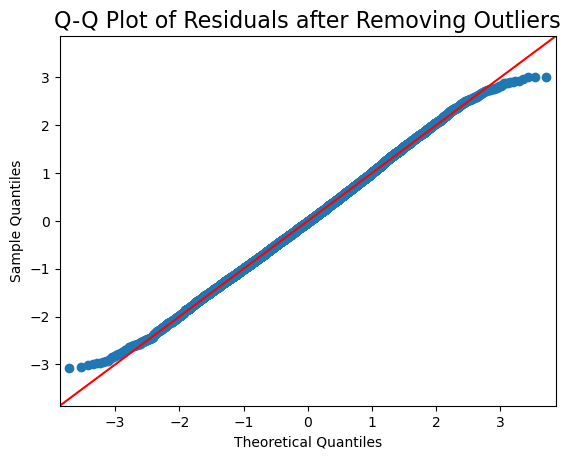

In [15]:
## THIS CODE SECTION BELOW IS THE GENERAL RESULTS SHOWN IN THE REPORT ##



import pandas as pd
import statsmodels.api as sm
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

file_path = 'data_export.csv'
df = pd.read_csv(file_path)

fields_to_convert = [
    "journal_h_index", "num_authors", "num_institutions",
    "cited_by_count", "publication_year", "avg_author_h_index", "max_author_h_index",
    "avg_institution_h_index", "max_institution_h_index", "avg_author_citations_past_5_years",
    "max_author_citations_past_5_years", "avg_institution_citations_past_5_years", 
    "max_institution_citations_past_5_years"
]
for field in fields_to_convert:
    df[field] = pd.to_numeric(df[field], errors="coerce").fillna(0)


df["publication_date"] = pd.to_datetime(df["publication_date"], errors="coerce")


df = df[df["cited_by_count"] > 0]


variables_to_log_transform = [
    "cited_by_count", 
    "avg_author_citations_past_5_years", 
    "avg_institution_citations_past_5_years", 
    "num_authors", 
    "num_institutions", 
    "journal_h_index"
]
for var in variables_to_log_transform:
    df[f"log_{var}"] = np.log1p(df[var])  # log(1 + variable)


df["years_since_publication"] = 2024 - df["publication_year"]


X = df[[
    "log_avg_author_citations_past_5_years", 
    "years_since_publication", 
    "log_journal_h_index", 
    "log_num_authors", 
    "log_num_institutions", 
    "log_avg_institution_citations_past_5_years",
]]
y = df["log_cited_by_count"]


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal

outlier_threshold = 3
non_outliers = np.abs(standardized_residuals) <= outlier_threshold


df_cleaned = df[non_outliers]


X_cleaned = df_cleaned[[
    "log_avg_author_citations_past_5_years", 
    "years_since_publication", 
    "log_journal_h_index", 
    "log_num_authors", 
    "log_num_institutions", 
    "log_avg_institution_citations_past_5_years",
]]
y_cleaned = df_cleaned["log_cited_by_count"]


X_cleaned = sm.add_constant(X_cleaned)


model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()


print(model_cleaned.summary())

plt.figure(figsize=(8, 6))
sm.qqplot(model_cleaned.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals after Removing Outliers", fontsize=16)
plt.show()

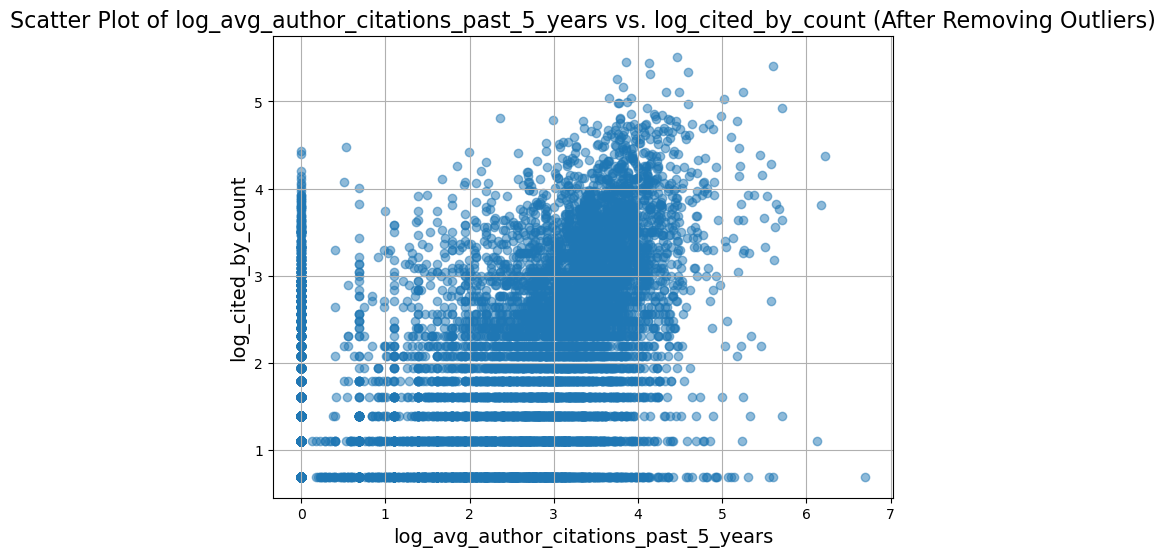

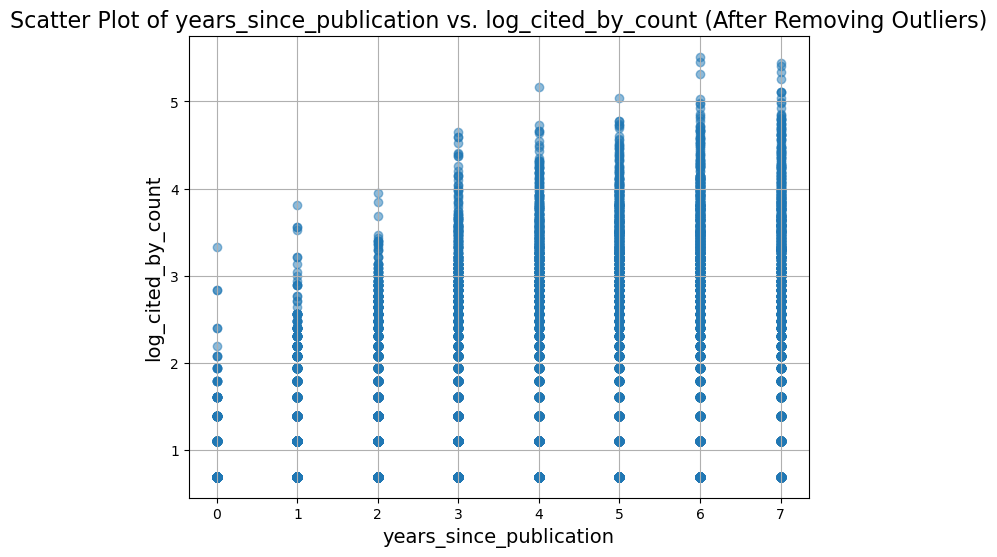

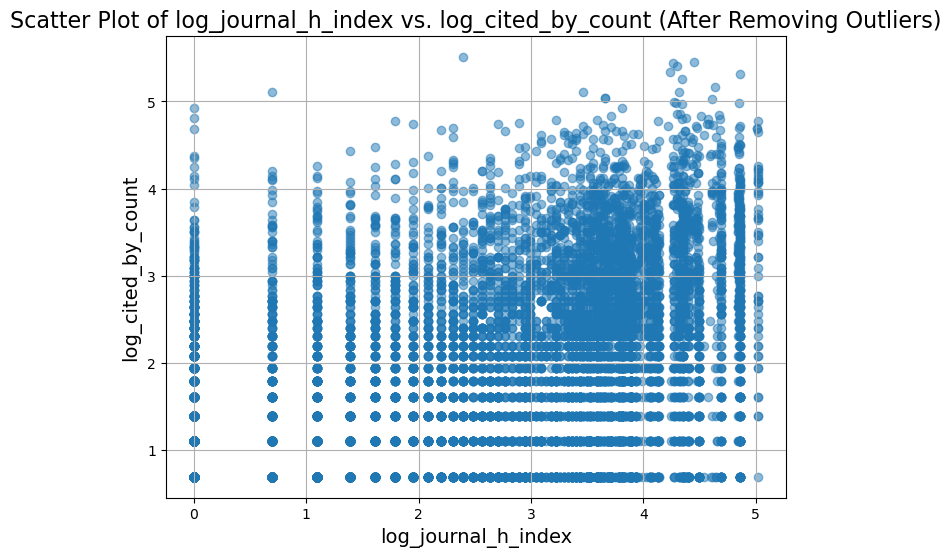

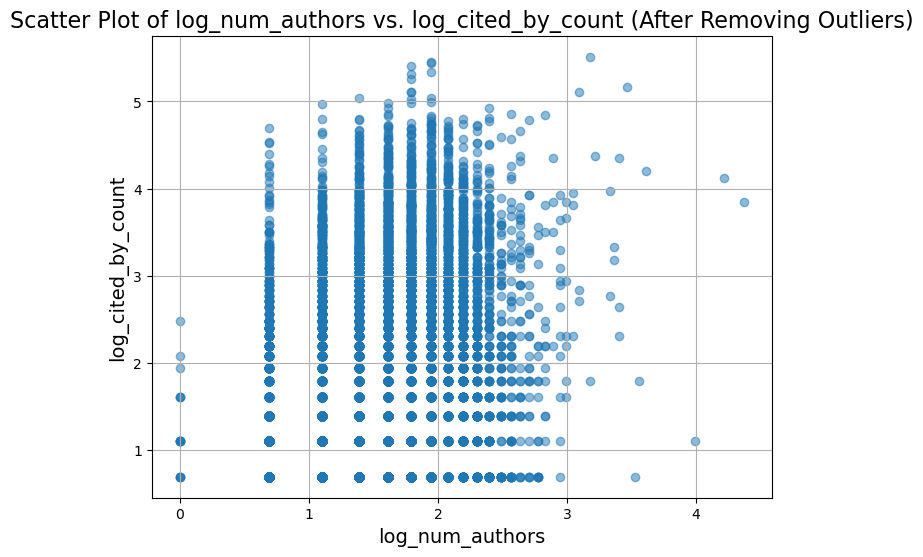

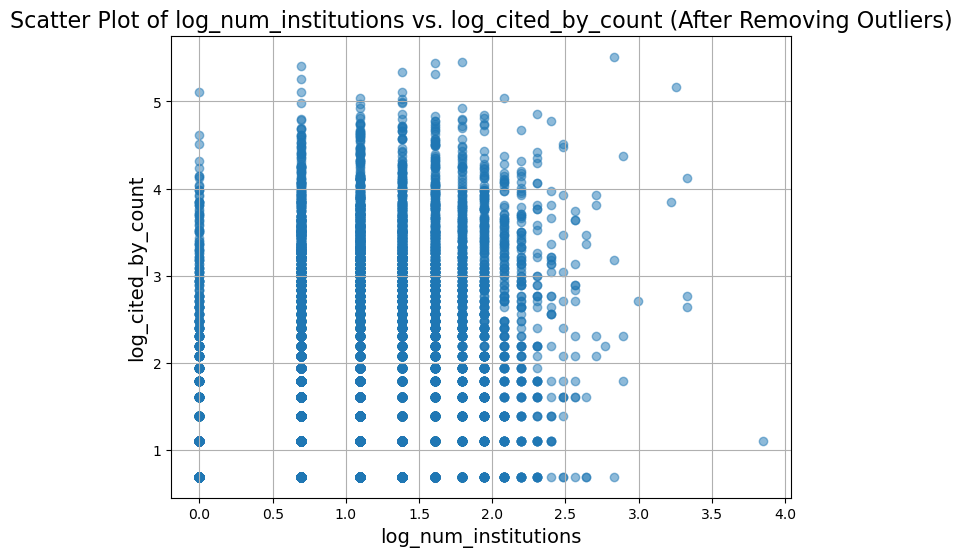

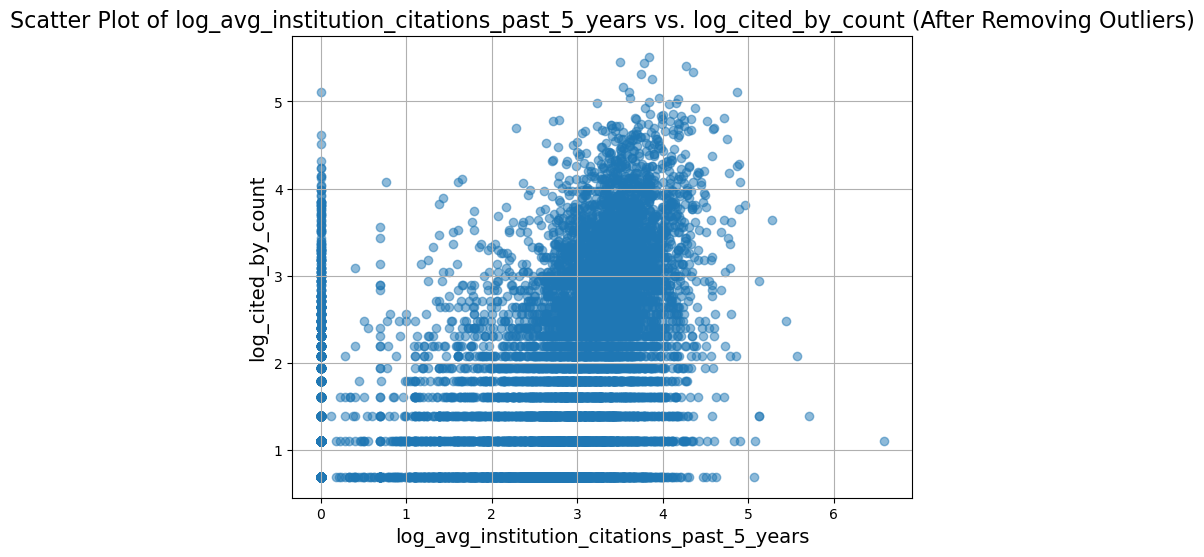

In [16]:

independent_vars = [
   "log_avg_author_citations_past_5_years", 
    "years_since_publication", 
    "log_journal_h_index", 
    "log_num_authors", 
    "log_num_institutions", 
    "log_avg_institution_citations_past_5_years",
]

for var in independent_vars:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_cleaned[var], y_cleaned, alpha=0.5)
    plt.title(f"Scatter Plot of {var} vs. log_cited_by_count (After Removing Outliers)", fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel("log_cited_by_count", fontsize=14)
    plt.grid(True)
    plt.show()


    ## THE SECTION BELOW NOW SHOWS SOME EXPLORATORY DATA ANALYSIS ##

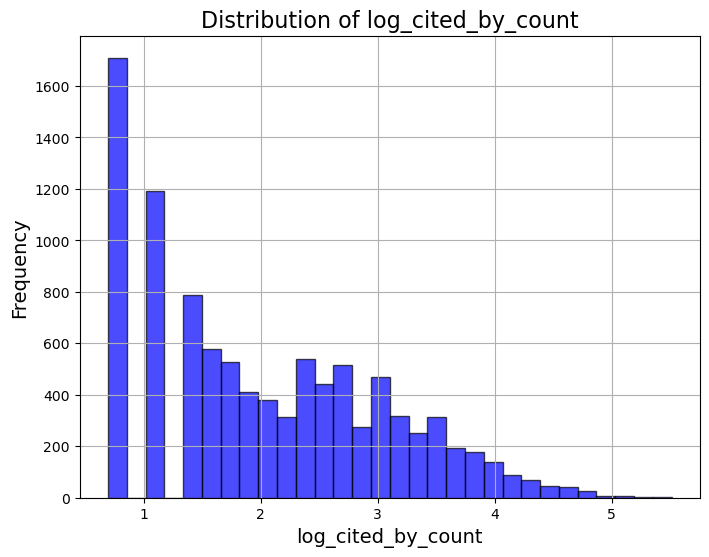

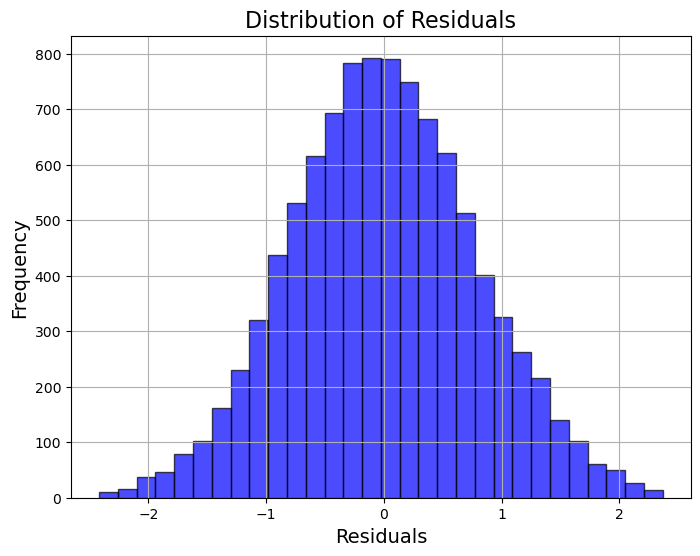

<Figure size 800x600 with 0 Axes>

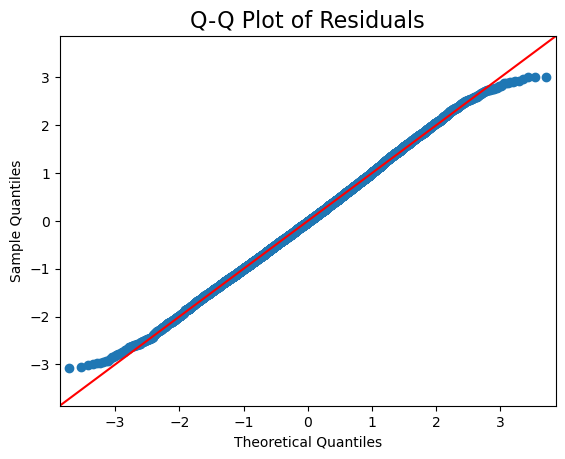

In [17]:
# Plot the distribution of y_cleaned to assess normality
plt.figure(figsize=(8, 6))
plt.hist(y_cleaned, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("Distribution of log_cited_by_count", fontsize=16)
plt.xlabel("log_cited_by_count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

# Calculate residuals
residuals = y_cleaned - model_cleaned.predict(X_cleaned)

# Plot the histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("Distribution of Residuals", fontsize=16)
plt.xlabel("Residuals", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

# Generate a Q-Q plot of residuals
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals", fontsize=16)
plt.show()

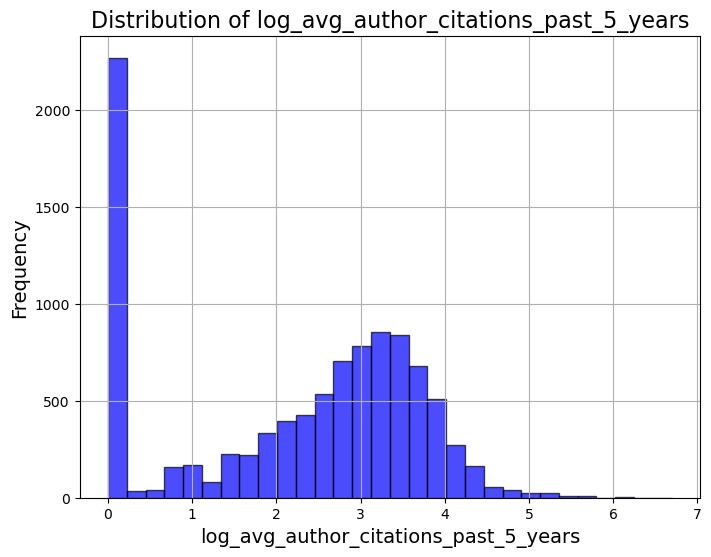

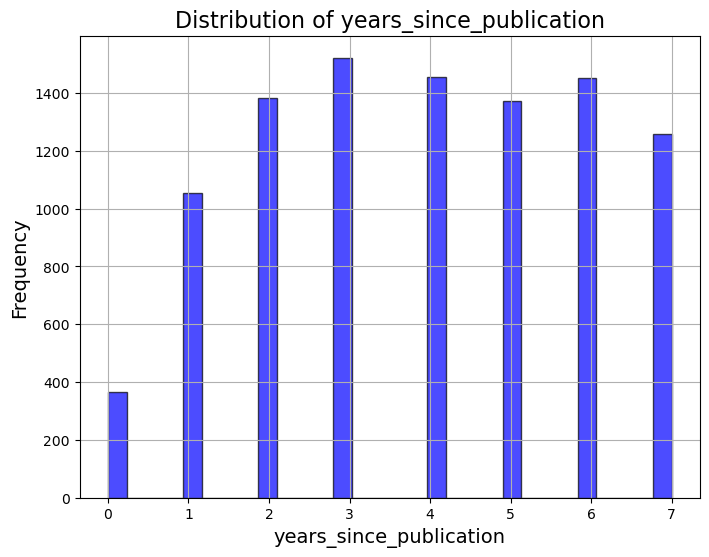

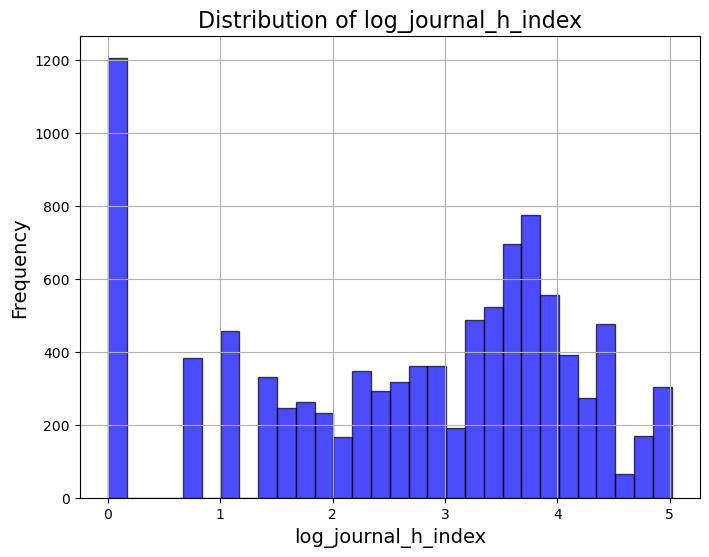

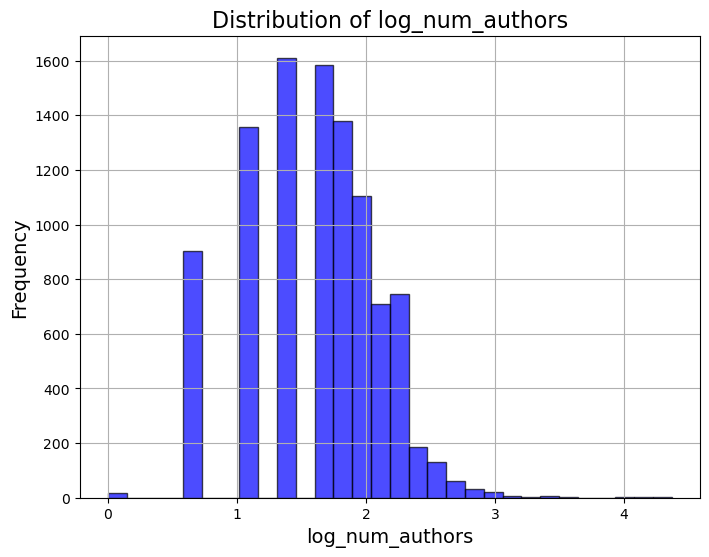

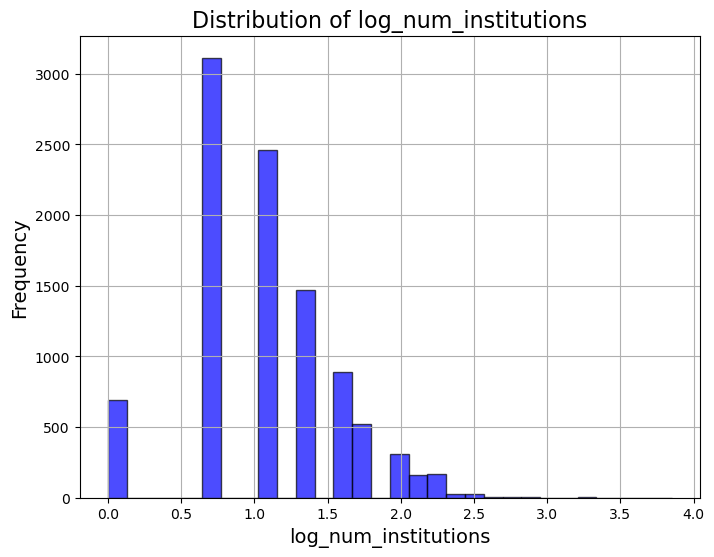

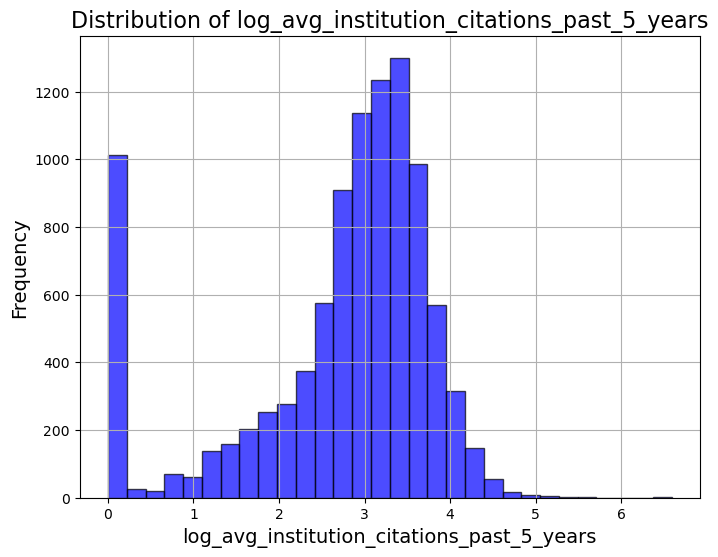

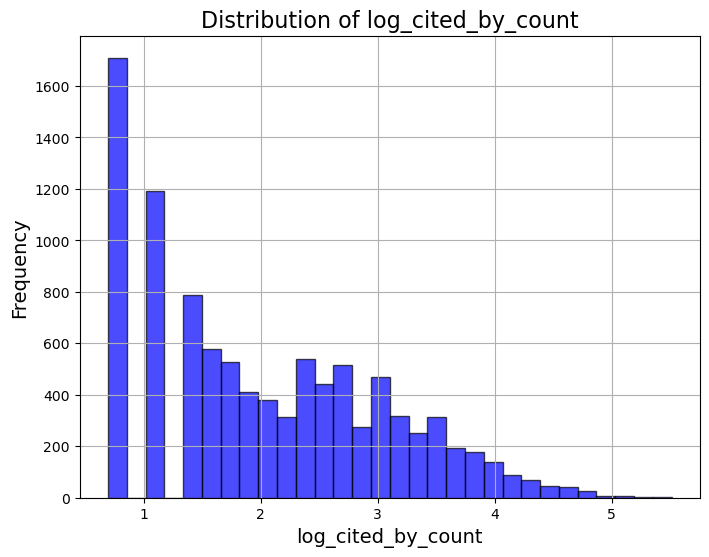

In [18]:
import matplotlib.pyplot as plt

# List of variables to plot
variables = [
   "log_avg_author_citations_past_5_years", 
    "years_since_publication", 
    "log_journal_h_index", 
    "log_num_authors", 
    "log_num_institutions", 
    "log_avg_institution_citations_past_5_years",
]

# Loop through each variable in X_initial and plot its distribution
for var in variables:
    plt.figure(figsize=(8, 6))
    plt.hist(df[var], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"Distribution of {var}", fontsize=16)
    plt.xlabel(var, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(True)
    plt.show()

# Plot the distribution of the dependent variable y_initial
plt.figure(figsize=(8, 6))
plt.hist(y_cleaned, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("Distribution of log_cited_by_count", fontsize=16)
plt.xlabel("log_cited_by_count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

In [19]:


## THIS CODE NOW DOES THE LINEAR REGRESSION MODEL BY THE 8 SUB-TYPE CATEGORIES WITHIN SOCCER RESEARCH ##


import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'data_export.csv'
df = pd.read_csv(file_path)


fields_to_convert = [
    "journal_h_index", "num_authors", "num_institutions",
    "cited_by_count", "publication_year", "avg_author_h_index", "max_author_h_index",
    "avg_institution_h_index", "max_institution_h_index", "avg_author_citations_past_5_years",
    "max_author_citations_past_5_years", "avg_institution_citations_past_5_years", 
    "max_institution_citations_past_5_years"
]
for field in fields_to_convert:
    df[field] = pd.to_numeric(df[field], errors="coerce").fillna(0)

# Convert publication_date to datetime
df["publication_date"] = pd.to_datetime(df["publication_date"], errors="coerce")


df = df[df["cited_by_count"] > 0]


variables_to_log_transform = [
    "cited_by_count", 
    "avg_author_citations_past_5_years", 
    "avg_institution_citations_past_5_years", 
    "num_authors", 
    "num_institutions", 
    "journal_h_index"
]
for var in variables_to_log_transform:
    df[f"log_{var}"] = np.log1p(df[var])  # log(1 + variable)


df["years_since_publication"] = 2024 - df["publication_year"]


if "predicted_category" not in df.columns:
    raise ValueError("The dataset must contain a 'predicted_category' column.")


category_results = {}


for category in df["predicted_category"].unique():
    df_category = df[df["predicted_category"] == category]  

    X = df_category[[
        "log_avg_author_citations_past_5_years", 
        "years_since_publication", 
        "log_journal_h_index", 
        "log_num_authors", 
        "log_num_institutions", 
        "log_avg_institution_citations_past_5_years",
    ]]
    y = df_category["log_cited_by_count"]


    X = sm.add_constant(X)


    model = sm.OLS(y, X).fit()

    category_results[category] = model


    print(f"Category: {category}")
    print(model.summary())
    print("\n" + "="*80 + "\n")



Category: Physical Attributes
                            OLS Regression Results                            
Dep. Variable:     log_cited_by_count   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     518.5
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:05:08   Log-Likelihood:                -4312.2
No. Observations:                3779   AIC:                             8638.
Df Residuals:                    3772   BIC:                             8682.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

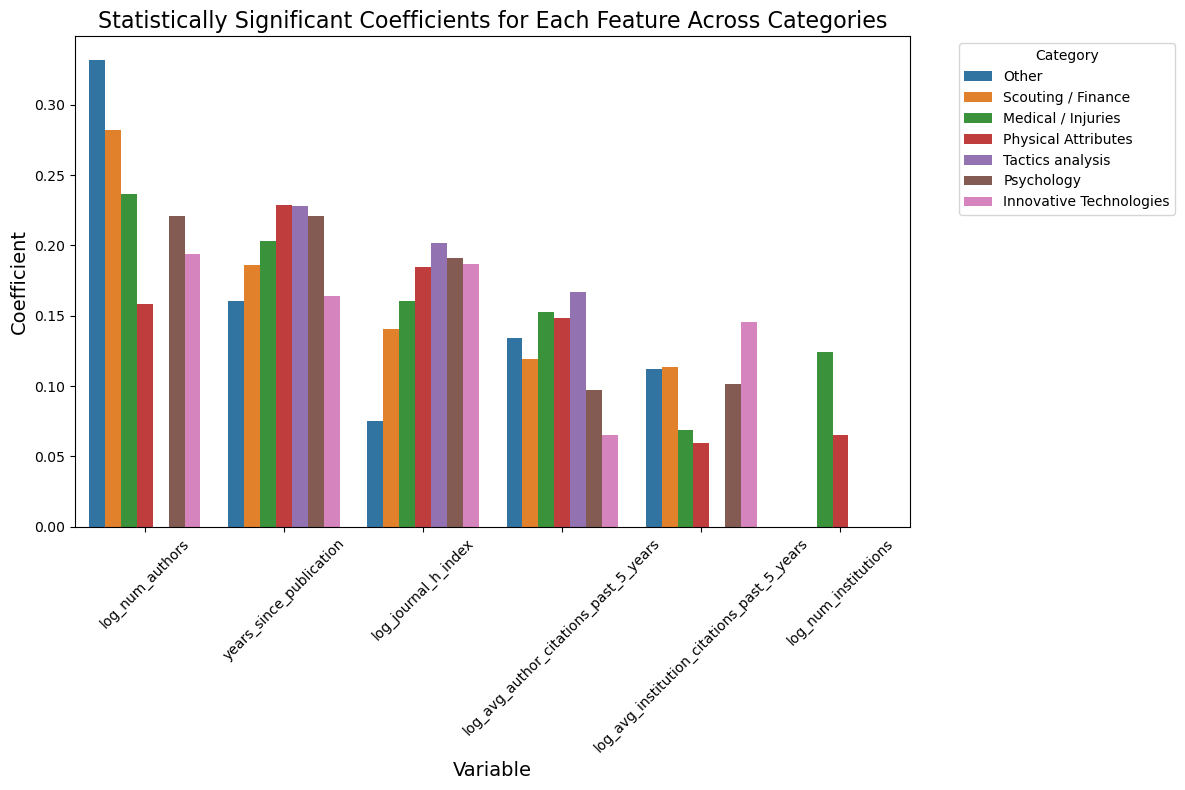

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


visualization_data = []

for category, results in category_results.items():
    for variable in [
        "log_avg_author_citations_past_5_years",
        "years_since_publication", 
        "log_journal_h_index",  
        "log_num_authors",      
        "log_num_institutions", 
        "log_avg_institution_citations_past_5_years" 
    ]:
        coef = results.params.get(variable, 0)  
        p_value = results.pvalues.get(variable, 1)  
        is_significant = p_value < 0.05  

   
        if is_significant:
            visualization_data.append({
                "Category": category,
                "Variable": variable,
                "Coefficient": coef
            })


coef_melted_with_significance = pd.DataFrame(visualization_data)


if not coef_melted_with_significance.empty:
    # Sort the data to have a clean, ordered plot
    coef_melted_with_significance.sort_values(by="Coefficient", ascending=False, inplace=True)


    plt.figure(figsize=(12, 8))  # Adjust for better readability

    sns.barplot(
        data=coef_melted_with_significance,
        x="Variable",
        y="Coefficient",
        hue="Category",
        dodge=True,
        palette="tab10"  
    )

    # Title and labels
    plt.title("Statistically Significant Coefficients for Each Feature Across Categories", fontsize=16)
    plt.xlabel("Variable", fontsize=14)
    plt.ylabel("Coefficient", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    plt.show()
else:
    print("No significant coefficients to plot.")

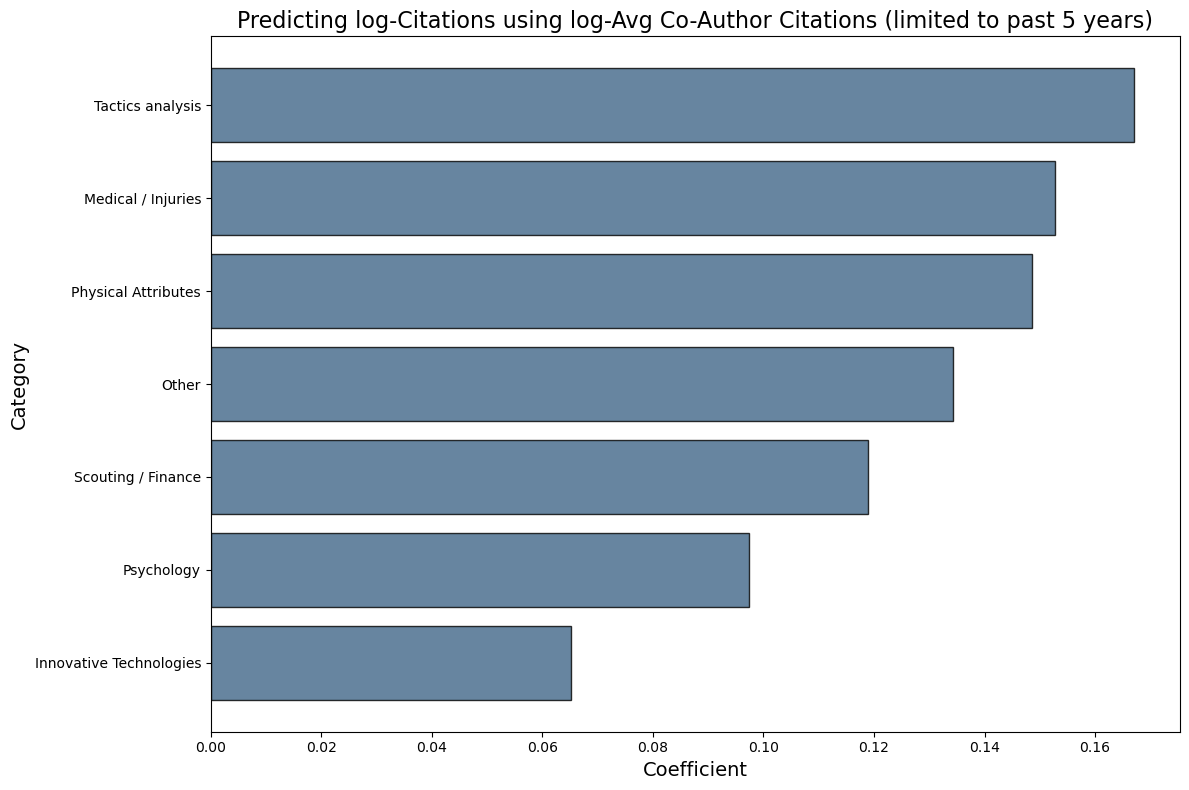

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

visualization_data = []

for category, results in category_results.items():
    variable = "log_avg_author_citations_past_5_years" 
    coef = results.params.get(variable, 0)  
    p_value = results.pvalues.get(variable, 1)  
    is_significant = p_value < 0.05  

    if is_significant:
        visualization_data.append({
            "Category": category,
            "Coefficient": coef
        })

coef_melted_with_significance = pd.DataFrame(visualization_data)

if not coef_melted_with_significance.empty:

    coef_melted_with_significance = coef_melted_with_significance.sort_values(by="Coefficient", ascending=False)

    # Define a single color for the bars
    bar_color = "#416788"

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))  # Adjust vertical space for better readability
    for index, row in coef_melted_with_significance.iterrows():
        ax.barh(row["Category"], row["Coefficient"], color=bar_color, edgecolor='black', alpha=0.8)

    ax.invert_yaxis()

    ax.set_title("Predicting log-Citations using log-Avg Co-Author Citations (limited to past 5 years)", fontsize=16)
    ax.set_xlabel("Coefficient", fontsize=14)
    ax.set_ylabel("Category", fontsize=14)

    plt.tight_layout()
    plt.show()
else:
    print("No significant coefficients to plot.")


In [ ]:
## THIS CODE SECTION BELOW HAS THE CODE TO SHOW THE RESULTS IF YOU STANDARDIZE THE MEAN = 0 and STD DEV = 1.  The results are minimal in terms of size and rank of coefficients across research sub-type ##

Model with Standardized Coefficients:
                            OLS Regression Results                            
Dep. Variable:     log_cited_by_count   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     1183.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:17:41   Log-Likelihood:                -11255.
No. Observations:                9816   AIC:                         2.252e+04
Df Residuals:                    9809   BIC:                         2.257e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

<Figure size 800x600 with 0 Axes>

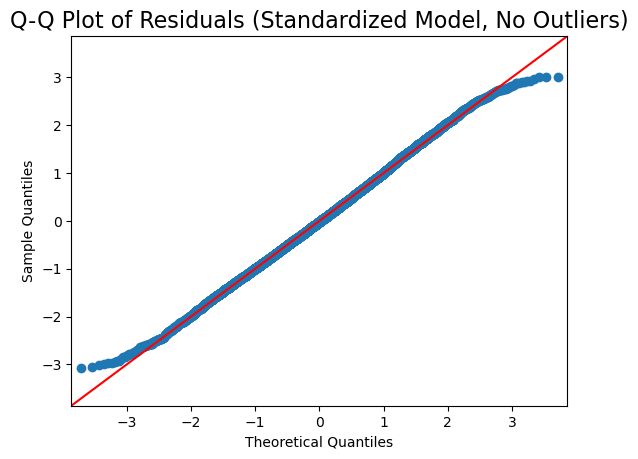

In [26]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'data_export.csv'
df = pd.read_csv(file_path)

# Convert fields to numeric and fill missing values
fields_to_convert = [
    "journal_h_index", "num_authors", "num_institutions",
    "cited_by_count", "publication_year", "avg_author_h_index", "max_author_h_index",
    "avg_institution_h_index", "max_institution_h_index", "avg_author_citations_past_5_years",
    "max_author_citations_past_5_years", "avg_institution_citations_past_5_years", 
    "max_institution_citations_past_5_years"
]
for field in fields_to_convert:
    df[field] = pd.to_numeric(df[field], errors="coerce").fillna(0)

# Convert publication_date to datetime
df["publication_date"] = pd.to_datetime(df["publication_date"], errors="coerce")

# Filter for positive citation counts
df = df[df["cited_by_count"] > 0]

# Apply log transformations
variables_to_log_transform = [
    "cited_by_count", 
    "avg_author_citations_past_5_years", 
    "avg_institution_citations_past_5_years", 
    "num_authors", 
    "num_institutions", 
    "journal_h_index"
]
for var in variables_to_log_transform:
    df[f"log_{var}"] = np.log1p(df[var])  # log(1 + variable)

# Calculate years since publication
df["years_since_publication"] = 2024 - df["publication_year"]

# Define predictors and target
X = df[[
    "log_avg_author_citations_past_5_years", 
    "years_since_publication", 
    "log_journal_h_index", 
    "log_num_authors", 
    "log_num_institutions", 
    "log_avg_institution_citations_past_5_years",
]]
y = df["log_cited_by_count"]

# Add a constant term
X = sm.add_constant(X)

# Fit the initial model
model = sm.OLS(y, X).fit()

# Identify and remove outliers using standardized residuals
influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal

outlier_threshold = 3
non_outliers = np.abs(standardized_residuals) <= outlier_threshold

# Filter outliers from the dataset
df_cleaned = df[non_outliers]

# Define predictors and target for the cleaned dataset
X_cleaned = df_cleaned[[
    "log_avg_author_citations_past_5_years", 
    "years_since_publication", 
    "log_journal_h_index", 
    "log_num_authors", 
    "log_num_institutions", 
    "log_avg_institution_citations_past_5_years",
]]
y_cleaned = df_cleaned["log_cited_by_count"]

# Standardize the predictors and target
X_cleaned_standardized = (X_cleaned - X_cleaned.mean()) / X_cleaned.std()
y_cleaned_standardized = (y_cleaned - y_cleaned.mean()) / y_cleaned.std()

# Add a constant term to the standardized predictors
X_cleaned_standardized = sm.add_constant(X_cleaned_standardized)

# Fit the model with standardized variables
model_cleaned_standardized = sm.OLS(y_cleaned_standardized, X_cleaned_standardized).fit()

# Print the summary of the standardized model
print("Model with Standardized Coefficients:")
print(model_cleaned_standardized.summary())

# Plot Q-Q plot of residuals
plt.figure(figsize=(8, 6))
sm.qqplot(model_cleaned_standardized.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals (Standardized Model, No Outliers)", fontsize=16)
plt.show()

In [22]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'data_export.csv'
df = pd.read_csv(file_path)

# Convert necessary fields to numeric and fill missing values
fields_to_convert = [
    "journal_h_index", "num_authors", "num_institutions",
    "cited_by_count", "publication_year", "avg_author_h_index", "max_author_h_index",
    "avg_institution_h_index", "max_institution_h_index", "avg_author_citations_past_5_years",
    "max_author_citations_past_5_years", "avg_institution_citations_past_5_years", 
    "max_institution_citations_past_5_years"
]
for field in fields_to_convert:
    df[field] = pd.to_numeric(df[field], errors="coerce").fillna(0)

# Convert publication_date to datetime
df["publication_date"] = pd.to_datetime(df["publication_date"], errors="coerce")

# Filter for positive citation counts
df = df[df["cited_by_count"] > 0]

# Apply log transformations
variables_to_log_transform = [
    "cited_by_count", 
    "avg_author_citations_past_5_years", 
    "avg_institution_citations_past_5_years", 
    "num_authors", 
    "num_institutions", 
    "journal_h_index"
]
for var in variables_to_log_transform:
    df[f"log_{var}"] = np.log1p(df[var])  # log(1 + variable)

# Calculate years since publication
df["years_since_publication"] = 2024 - df["publication_year"]

# Ensure required column exists
if "predicted_category" not in df.columns:
    raise ValueError("The dataset must contain a 'predicted_category' column.")

# Initialize a dictionary to store results
category_results = {}
standardized_coefficients = []

# Loop through categories
for category in df["predicted_category"].unique():
    df_category = df[df["predicted_category"] == category].dropna()  # Filter by category and remove missing values

    # Define predictors and target
    X = df_category[[
        "log_avg_author_citations_past_5_years", 
        "years_since_publication", 
        "log_journal_h_index", 
        "log_num_authors", 
        "log_num_institutions", 
        "log_avg_institution_citations_past_5_years",
    ]]
    y = df_category["log_cited_by_count"]

    # Standardize predictors and target for standardized coefficients
    X_standardized = (X - X.mean()) / X.std()
    y_standardized = (y - y.mean()) / y.std()

    # Add a constant term
    X = sm.add_constant(X)
    X_standardized = sm.add_constant(X_standardized)

    # Fit models
    model = sm.OLS(y, X).fit()
    model_standardized = sm.OLS(y_standardized, X_standardized).fit()

    # Save results
    category_results[category] = model

    # Print model summary
    print(f"Category: {category}")
    print(model.summary())
    print("\n" + "="*80 + "\n")

    # Store standardized coefficients
    for var, coef in model_standardized.params.items():
        standardized_coefficients.append({
            "category": category,
            "variable": var,
            "standardized_coefficient": coef
        })

# Convert standardized coefficients to DataFrame for analysis
std_coef_df = pd.DataFrame(standardized_coefficients)

# Optional: Save standardized coefficients to CSV
#std_coef_df.to_csv("standardized_coefficients.csv", index=False)

# Print standardized coefficients summary
print("Standardized Coefficients Summary:")
print(std_coef_df)

Category: Physical Attributes
                            OLS Regression Results                            
Dep. Variable:     log_cited_by_count   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     504.5
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:05:09   Log-Likelihood:                -4236.9
No. Observations:                3708   AIC:                             8488.
Df Residuals:                    3701   BIC:                             8531.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

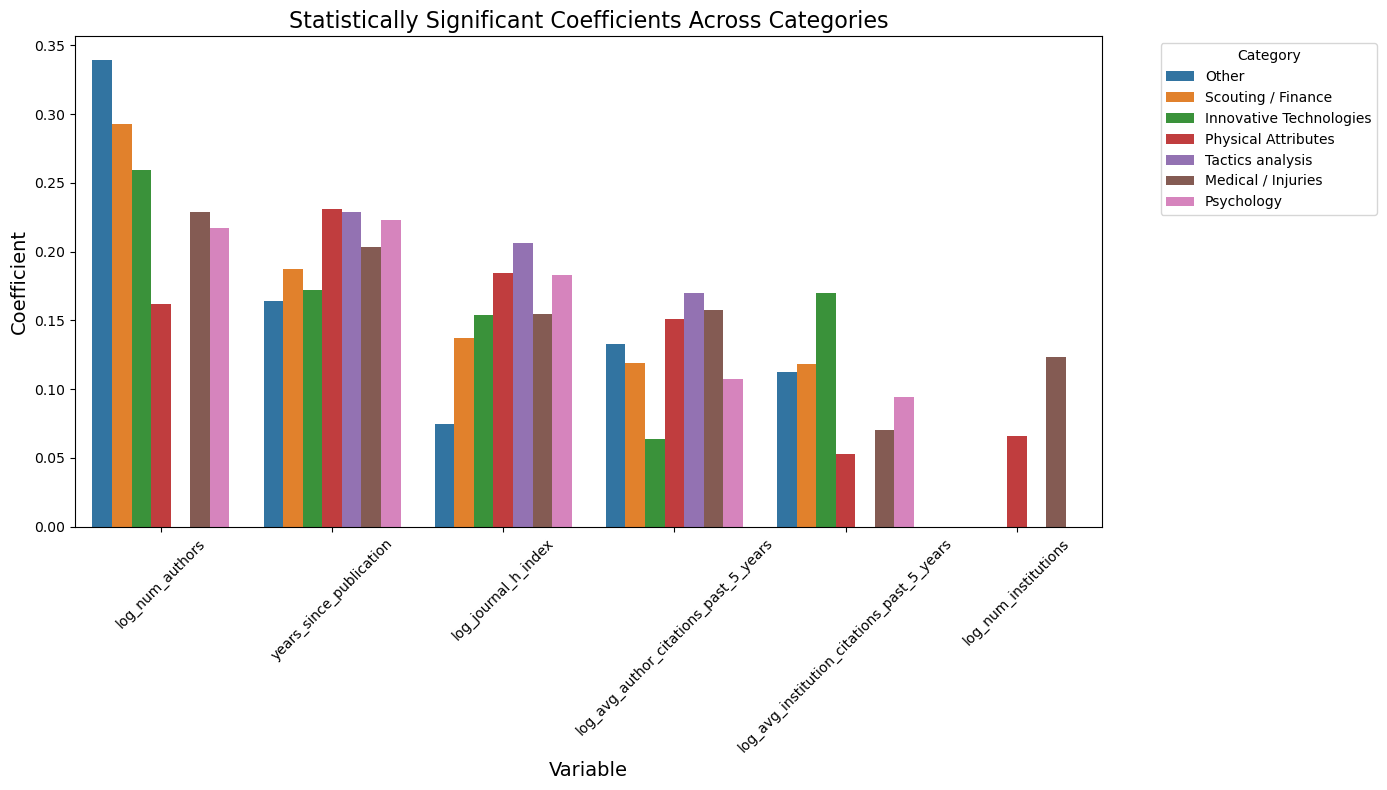

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Initialize a list to store visualization data
visualization_data = []

# Extract coefficients and significance from regression results
for category, results in category_results.items():
    for variable in [
        "log_avg_author_citations_past_5_years",
        "years_since_publication", 
        "log_journal_h_index",  
        "log_num_authors",      
        "log_num_institutions", 
        "log_avg_institution_citations_past_5_years"
    ]:
        coef = results.params.get(variable, 0)  # Get the coefficient
        p_value = results.pvalues.get(variable, 1)  # Get the p-value
        is_significant = p_value < 0.05  # Check significance

        # Only include statistically significant coefficients
        if is_significant:
            visualization_data.append({
                "Category": category,
                "Variable": variable,
                "Coefficient": coef,
                "p-value": p_value
            })

# Convert the list of visualization data to a DataFrame
coef_melted_with_significance = pd.DataFrame(visualization_data)

# Check if there are any significant coefficients to plot
if not coef_melted_with_significance.empty:
    # Sort by coefficients for cleaner visualization
    coef_melted_with_significance.sort_values(by="Coefficient", ascending=False, inplace=True)

    # Create a bar plot for significant coefficients
    plt.figure(figsize=(14, 8))  # Adjust figure size for readability
    sns.barplot(
        data=coef_melted_with_significance,
        x="Variable",
        y="Coefficient",
        hue="Category",
        dodge=True,
        palette="tab10"  # Use a visually distinct color palette
    )

    # Add plot title and labels
    plt.title("Statistically Significant Coefficients Across Categories", fontsize=16)

    plt.xlabel("Variable", fontsize=14)
    plt.ylabel("Coefficient", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

else:
    print("No significant coefficients to plot.")

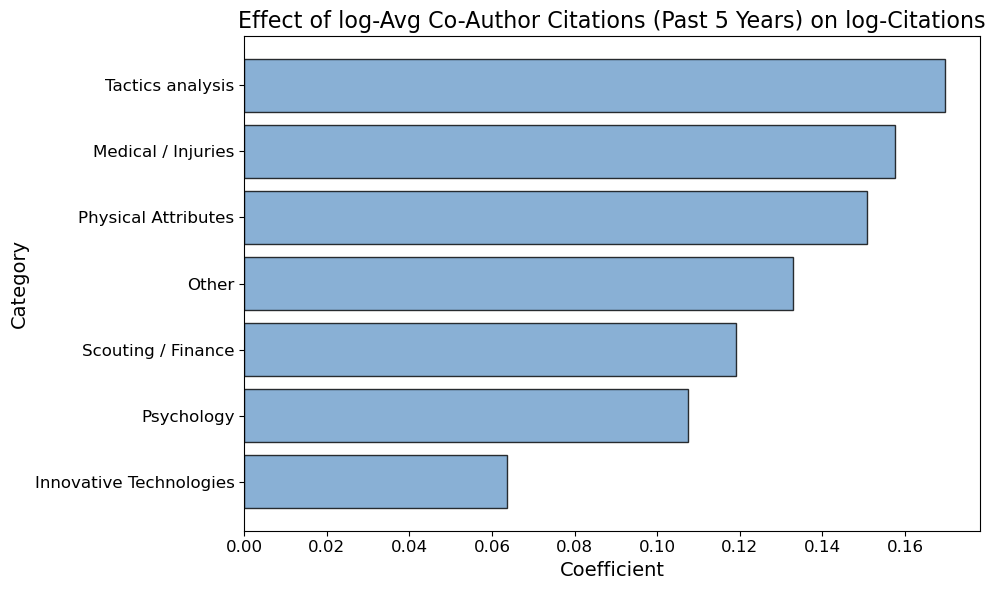

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data for visualization
visualization_data = []

# Extract coefficients and significance for the specific variable
for category, results in category_results.items():
    variable = "log_avg_author_citations_past_5_years"
    coef = results.params.get(variable, 0)  # Get the coefficient
    p_value = results.pvalues.get(variable, 1)  # Get the p-value
    is_significant = p_value < 0.05  # Check if the coefficient is statistically significant

    # Include only significant coefficients
    if is_significant:
        visualization_data.append({
            "Category": category,
            "Coefficient": coef,
            "p-value": p_value
        })

# Convert the data to a DataFrame for easier handling
coef_melted_with_significance = pd.DataFrame(visualization_data)

# Check if there are significant coefficients to plot
if not coef_melted_with_significance.empty:
    # Sort coefficients for better visualization
    coef_melted_with_significance.sort_values(by="Coefficient", ascending=False, inplace=True)

    # Define plot colors
    bar_color = "#416788"  # Color for bars
    significant_color = "#6C9DCB"  # Color for significant bars

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size for readability
    for index, row in coef_melted_with_significance.iterrows():
        ax.barh(
            row["Category"],
            row["Coefficient"],
            color=bar_color if row["p-value"] >= 0.01 else significant_color,
            edgecolor='black',
            alpha=0.8
        )

    # Adjust the y-axis to display categories in descending order
    ax.invert_yaxis()

    # Add title and axis labels
    ax.set_title("Effect of log-Avg Co-Author Citations (Past 5 Years) on log-Citations", fontsize=16)
    ax.set_xlabel("Coefficient", fontsize=14)
    ax.set_ylabel("Category", fontsize=14)

    # Customize ticks and layout
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()

    # Display the plot
    plt.show()

else:
    print("No significant coefficients to plot.")

In [25]:
import pandas as pd

# Prepare the data for visualization
visualization_data = []

# Extract coefficients and significance for the specific variable
for category, results in category_results.items():
    variable = "log_avg_author_citations_past_5_years"
    coef = results.params.get(variable, 0)  # Get the coefficient
    p_value = results.pvalues.get(variable, 1)  # Get the p-value
    is_significant = p_value < 0.05  # Check if the coefficient is statistically significant

    # Include all coefficients regardless of significance
    visualization_data.append({
        "Category": category,
        "Coefficient": coef,
        "p-value": p_value,
        "Significant": "Yes" if is_significant else "No"
    })

# Convert to a DataFrame
coef_table = pd.DataFrame(visualization_data)

# Sort the table by Coefficient in descending order
coef_table_sorted = coef_table.sort_values(by="Coefficient", ascending=False)

# Print the table to the console
print("Coefficients for log_avg_author_citations_past_5_years (sorted by magnitude):")
print(coef_table_sorted)



Coefficients for log_avg_author_citations_past_5_years (sorted by magnitude):
                  Category  Coefficient       p-value Significant
1         Tactics analysis     0.169661  1.130974e-08         Yes
2       Medical / Injuries     0.157508  3.136606e-17         Yes
0      Physical Attributes     0.150822  7.804177e-34         Yes
6                    Other     0.132782  4.675610e-06         Yes
5       Scouting / Finance     0.119185  3.703371e-11         Yes
3               Psychology     0.107359  1.338291e-04         Yes
4  Innovative Technologies     0.063704  3.163008e-03         Yes


In [ ]:
## THIS SECTION RUNS THE ENTIRE CODE AGAIN WITH OUT REMOVING THE PAPERS WITH CITATION COUNT = 0 ##

                            OLS Regression Results                            
Dep. Variable:     log_cited_by_count   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     2184.
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:25:12   Log-Likelihood:                -20149.
No. Observations:               14959   AIC:                         4.031e+04
Df Residuals:                   14952   BIC:                         4.037e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

<Figure size 800x600 with 0 Axes>

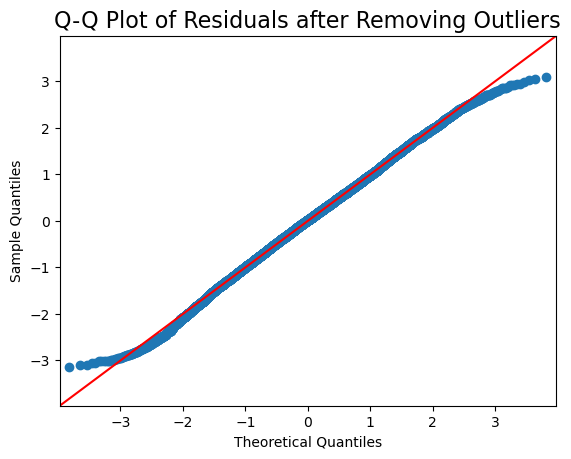

In [27]:
## THIS CODE SECTION BELOW IS THE GENERAL RESULTS SHOWN IN THE REPORT ##



import pandas as pd
import statsmodels.api as sm
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

file_path = 'data_export.csv'
df = pd.read_csv(file_path)

fields_to_convert = [
    "journal_h_index", "num_authors", "num_institutions",
    "cited_by_count", "publication_year", "avg_author_h_index", "max_author_h_index",
    "avg_institution_h_index", "max_institution_h_index", "avg_author_citations_past_5_years",
    "max_author_citations_past_5_years", "avg_institution_citations_past_5_years", 
    "max_institution_citations_past_5_years"
]
for field in fields_to_convert:
    df[field] = pd.to_numeric(df[field], errors="coerce").fillna(0)


df["publication_date"] = pd.to_datetime(df["publication_date"], errors="coerce")


#df = df[df["cited_by_count"] > 0] THIS CODE HAS BEEN COMMENTED OUT TO GET THE RESULTS USING ALL 15,000 DATA POINTS


variables_to_log_transform = [
    "cited_by_count", 
    "avg_author_citations_past_5_years", 
    "avg_institution_citations_past_5_years", 
    "num_authors", 
    "num_institutions", 
    "journal_h_index"
]
for var in variables_to_log_transform:
    df[f"log_{var}"] = np.log1p(df[var])  # log(1 + variable)


df["years_since_publication"] = 2024 - df["publication_year"]


X = df[[
    "log_avg_author_citations_past_5_years", 
    "years_since_publication", 
    "log_journal_h_index", 
    "log_num_authors", 
    "log_num_institutions", 
    "log_avg_institution_citations_past_5_years",
]]
y = df["log_cited_by_count"]


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


influence = model.get_influence()
standardized_residuals = influence.resid_studentized_internal

outlier_threshold = 3
non_outliers = np.abs(standardized_residuals) <= outlier_threshold


df_cleaned = df[non_outliers]


X_cleaned = df_cleaned[[
    "log_avg_author_citations_past_5_years", 
    "years_since_publication", 
    "log_journal_h_index", 
    "log_num_authors", 
    "log_num_institutions", 
    "log_avg_institution_citations_past_5_years",
]]
y_cleaned = df_cleaned["log_cited_by_count"]


X_cleaned = sm.add_constant(X_cleaned)


model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()


print(model_cleaned.summary())

plt.figure(figsize=(8, 6))
sm.qqplot(model_cleaned.resid, line='45', fit=True)
plt.title("Q-Q Plot of Residuals after Removing Outliers", fontsize=16)
plt.show()

In [28]:


## THIS CODE NOW DOES THE LINEAR REGRESSION MODEL BY THE 8 SUB-TYPE CATEGORIES WITHIN SOCCER RESEARCH ##


import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'data_export.csv'
df = pd.read_csv(file_path)


fields_to_convert = [
    "journal_h_index", "num_authors", "num_institutions",
    "cited_by_count", "publication_year", "avg_author_h_index", "max_author_h_index",
    "avg_institution_h_index", "max_institution_h_index", "avg_author_citations_past_5_years",
    "max_author_citations_past_5_years", "avg_institution_citations_past_5_years", 
    "max_institution_citations_past_5_years"
]
for field in fields_to_convert:
    df[field] = pd.to_numeric(df[field], errors="coerce").fillna(0)

# Convert publication_date to datetime
df["publication_date"] = pd.to_datetime(df["publication_date"], errors="coerce")


#df = df[df["cited_by_count"] > 0] THIS CODE HAS BEEN COMMENTED OUT TO SEE THE RESULTS USING ALL 15,000 DATA POINTS


variables_to_log_transform = [
    "cited_by_count", 
    "avg_author_citations_past_5_years", 
    "avg_institution_citations_past_5_years", 
    "num_authors", 
    "num_institutions", 
    "journal_h_index"
]
for var in variables_to_log_transform:
    df[f"log_{var}"] = np.log1p(df[var])  # log(1 + variable)


df["years_since_publication"] = 2024 - df["publication_year"]


if "predicted_category" not in df.columns:
    raise ValueError("The dataset must contain a 'predicted_category' column.")


category_results = {}


for category in df["predicted_category"].unique():
    df_category = df[df["predicted_category"] == category]  

    X = df_category[[
        "log_avg_author_citations_past_5_years", 
        "years_since_publication", 
        "log_journal_h_index", 
        "log_num_authors", 
        "log_num_institutions", 
        "log_avg_institution_citations_past_5_years",
    ]]
    y = df_category["log_cited_by_count"]


    X = sm.add_constant(X)


    model = sm.OLS(y, X).fit()

    category_results[category] = model


    print(f"Category: {category}")
    print(model.summary())
    print("\n" + "="*80 + "\n")



Category: Physical Attributes
                            OLS Regression Results                            
Dep. Variable:     log_cited_by_count   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     829.9
Date:                Thu, 23 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:26:26   Log-Likelihood:                -7433.9
No. Observations:                5504   AIC:                         1.488e+04
Df Residuals:                    5497   BIC:                         1.493e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

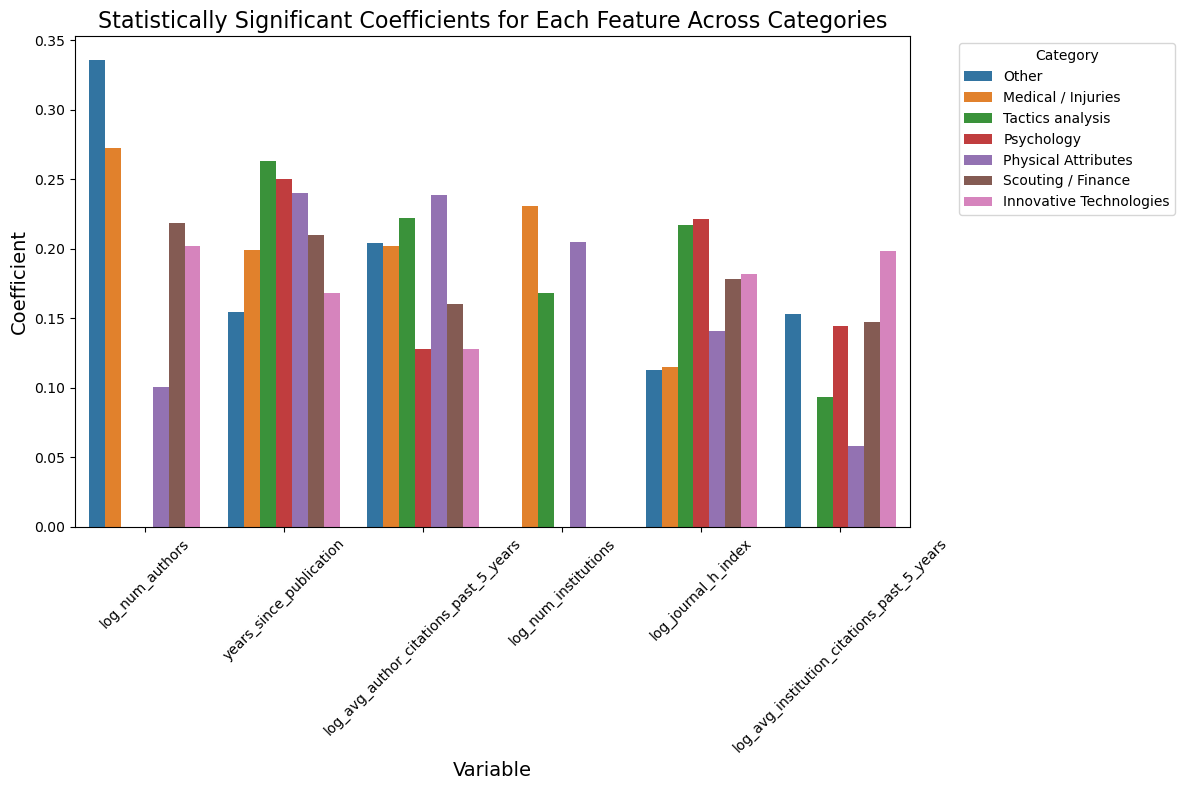

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


visualization_data = []

for category, results in category_results.items():
    for variable in [
        "log_avg_author_citations_past_5_years",
        "years_since_publication", 
        "log_journal_h_index",  
        "log_num_authors",      
        "log_num_institutions", 
        "log_avg_institution_citations_past_5_years" 
    ]:
        coef = results.params.get(variable, 0)  
        p_value = results.pvalues.get(variable, 1)  
        is_significant = p_value < 0.05  

   
        if is_significant:
            visualization_data.append({
                "Category": category,
                "Variable": variable,
                "Coefficient": coef
            })


coef_melted_with_significance = pd.DataFrame(visualization_data)


if not coef_melted_with_significance.empty:
    # Sort the data to have a clean, ordered plot
    coef_melted_with_significance.sort_values(by="Coefficient", ascending=False, inplace=True)


    plt.figure(figsize=(12, 8))  # Adjust for better readability

    sns.barplot(
        data=coef_melted_with_significance,
        x="Variable",
        y="Coefficient",
        hue="Category",
        dodge=True,
        palette="tab10"  
    )

    # Title and labels
    plt.title("Statistically Significant Coefficients for Each Feature Across Categories", fontsize=16)
    plt.xlabel("Variable", fontsize=14)
    plt.ylabel("Coefficient", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    plt.show()
else:
    print("No significant coefficients to plot.")

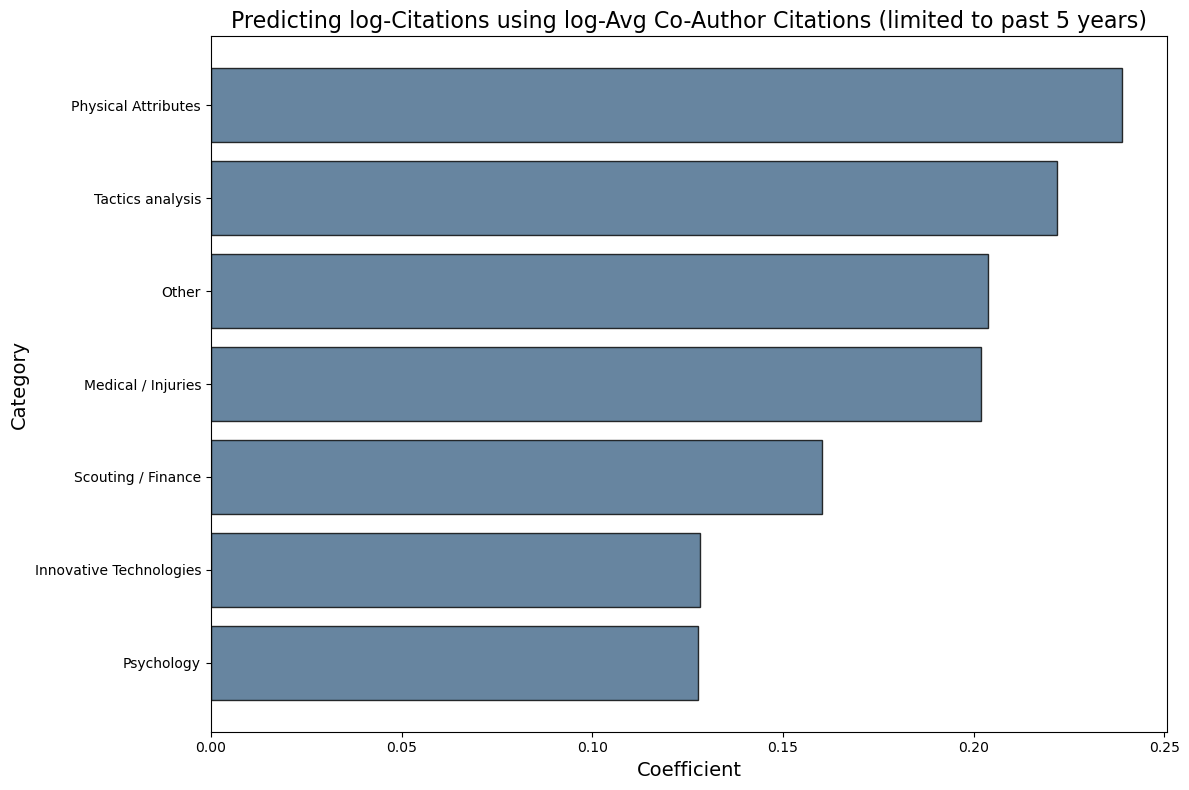

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

visualization_data = []

for category, results in category_results.items():
    variable = "log_avg_author_citations_past_5_years" 
    coef = results.params.get(variable, 0)  
    p_value = results.pvalues.get(variable, 1)  
    is_significant = p_value < 0.05  

    if is_significant:
        visualization_data.append({
            "Category": category,
            "Coefficient": coef
        })

coef_melted_with_significance = pd.DataFrame(visualization_data)

if not coef_melted_with_significance.empty:

    coef_melted_with_significance = coef_melted_with_significance.sort_values(by="Coefficient", ascending=False)

    # Define a single color for the bars
    bar_color = "#416788"

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 8))  # Adjust vertical space for better readability
    for index, row in coef_melted_with_significance.iterrows():
        ax.barh(row["Category"], row["Coefficient"], color=bar_color, edgecolor='black', alpha=0.8)

    ax.invert_yaxis()

    ax.set_title("Predicting log-Citations using log-Avg Co-Author Citations (limited to past 5 years)", fontsize=16)
    ax.set_xlabel("Coefficient", fontsize=14)
    ax.set_ylabel("Category", fontsize=14)

    plt.tight_layout()
    plt.show()
else:
    print("No significant coefficients to plot.")
